In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
import os
path = r'/content/drive/MyDrive/Subway_Data'
os.chdir(path)

Mounted at /content/drive


In [ ]:
data = pd.read_csv('NYC_subway_traffic_2017-2021.csv')
#data.head()
data['Datetime'] = pd.to_datetime(data['Datetime'])
data.set_index('Datetime', inplace=True)
#data.head()
data['Stop Name'].astype(str)

Datetime
2017-02-04 04:00:00        103 St
2017-02-04 04:00:00        103 St
2017-02-04 04:00:00        103 St
2017-02-04 04:00:00        111 St
2017-02-04 04:00:00        116 St
                          ...    
2021-08-13 20:00:00    5 Av/53 St
2021-08-13 20:00:00    5 Av/59 St
2021-08-13 20:00:00     Fulton St
2021-08-13 20:00:00     Fulton St
2021-08-13 20:00:00       Wall St
Name: Stop Name, Length: 4589380, dtype: object

In [ ]:
df1 = data[data['Stop Name']=='Grand Central - 42 St']
aggregated_df = df1.groupby([df1.index, 'Stop Name']).agg({'Entries':'sum', 'Exits':'sum'}).reset_index()
aggregated_df['Datetime'] = pd.to_datetime(aggregated_df['Datetime'])
aggregated_df.set_index('Datetime', inplace=True)

In [ ]:
from datetime import datetime

start_dt = datetime.strptime('2017-2-4', '%Y-%m-%d').date()
end_dt = datetime.strptime('2020-1-31', '%Y-%m-%d').date()
df2 = aggregated_df[(aggregated_df.index.date >= start_dt) & (aggregated_df.index.date <= end_dt)]
df2['Total'] = df2['Entries']+df2['Exits']
df2.head()

<ipython-input-4-8d0393887890>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Total'] = df2['Entries']+df2['Exits']


Stop Name  Entries    Exits    Total
Datetime                                                             
2017-02-04 04:00:00  Grand Central - 42 St    659.0    839.0   1498.0
2017-02-04 08:00:00  Grand Central - 42 St   4687.0   7575.0  12262.0
2017-02-04 12:00:00  Grand Central - 42 St  12800.0  12611.0  25411.0
2017-02-04 16:00:00  Grand Central - 42 St  16844.0  14150.0  30994.0
2017-02-04 20:00:00  Grand Central - 42 St  11494.0   9715.0  21209.0

In [ ]:
df3 = df2[df2.index.hour==20]
df3.head(15)

Stop Name  Entries    Exits    Total
Datetime                                                             
2017-02-04 20:00:00  Grand Central - 42 St  11494.0   9715.0  21209.0
2017-02-05 20:00:00  Grand Central - 42 St   7858.0   6434.0  14292.0
2017-02-06 20:00:00  Grand Central - 42 St  42673.0  18229.0  60902.0
2017-02-07 20:00:00  Grand Central - 42 St  46259.0  19016.0  65275.0
2017-02-08 20:00:00  Grand Central - 42 St  45321.0  20065.0  65386.0
2017-02-09 20:00:00  Grand Central - 42 St  20747.0   8793.0  29540.0
2017-02-10 20:00:00  Grand Central - 42 St  43339.0  20586.0  63925.0
2017-02-11 20:00:00  Grand Central - 42 St  13067.0  10336.0  23403.0
2017-02-12 20:00:00  Grand Central - 42 St   8459.0   6509.0  14968.0
2017-02-13 20:00:00  Grand Central - 42 St  45142.0  19393.0  64535.0
2017-02-14 20:00:00  Grand Central - 42 St  43165.0  18035.0  61200.0
2017-02-15 20:00:00  Grand Central - 42 St  45643.0  20515.0  66158.0
2017-02-16 20:00:00  Grand Central - 42 St  45397.0  21333.0  66730.0
2017-02-17 20:00:00  Grand Central - 42 St  39549.0  19157.0  58706.0
2017-02-18 20:00:00  Grand Central - 42 St  13192.0  11469.0  24661.0

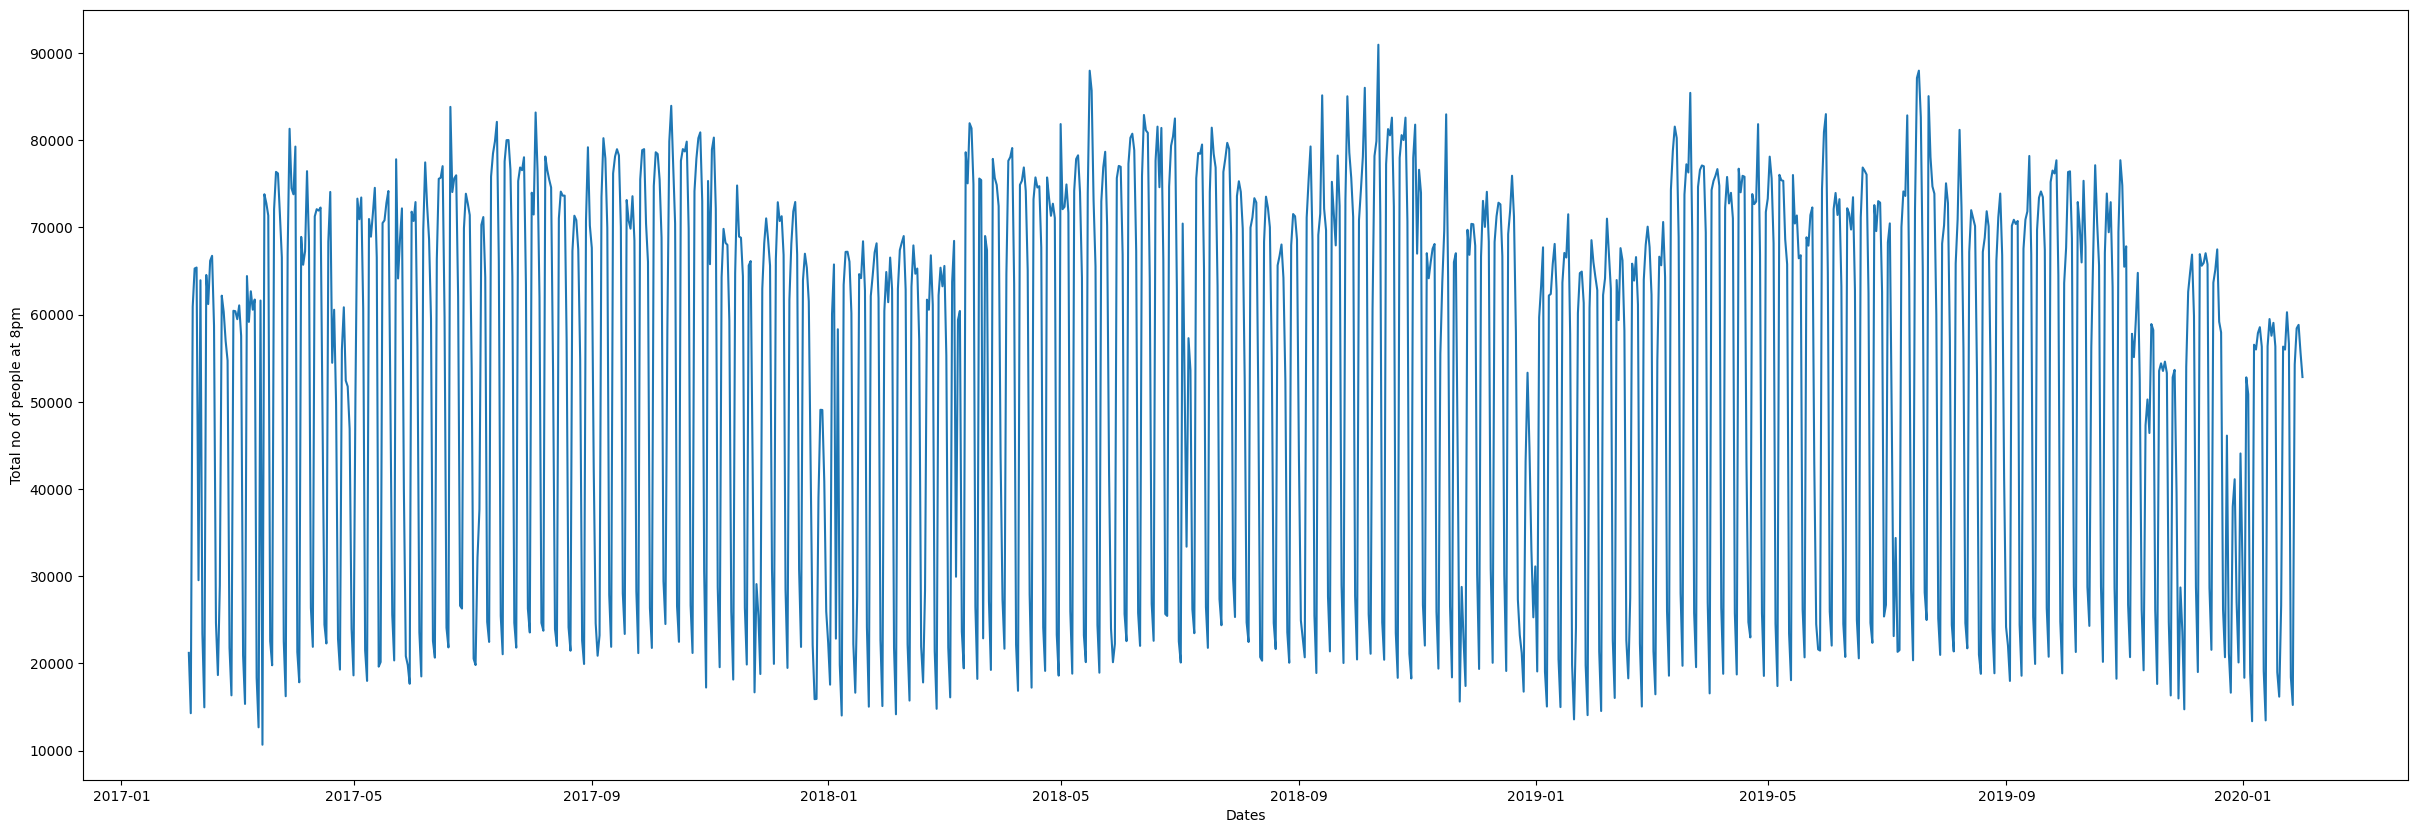

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(df3.index, df3['Total'])
plt.xlabel('Dates')
plt.ylabel('Total no of people at 8pm')
plt.show()

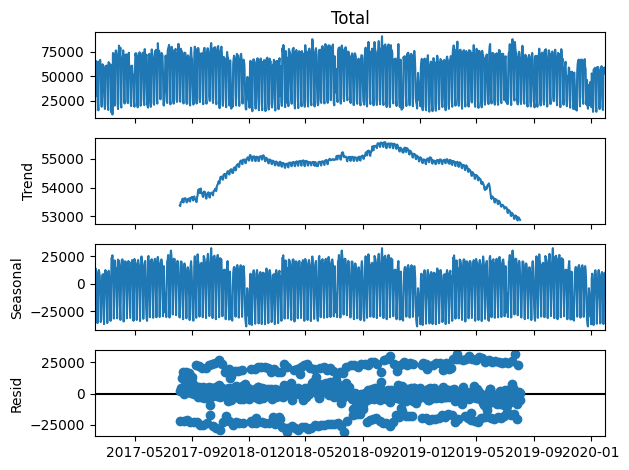

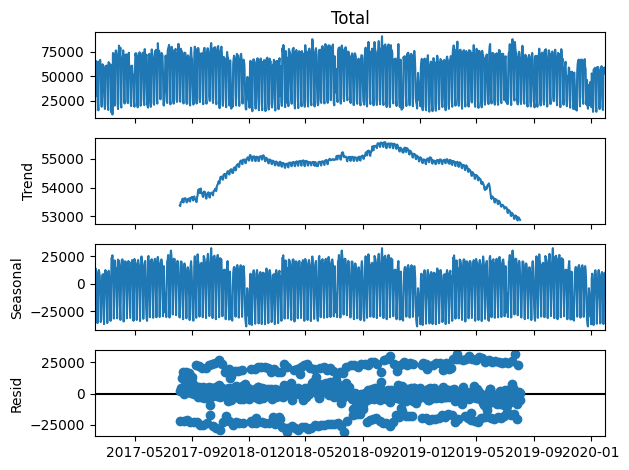

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df3['Total'], model="additive", period=365)
result.plot()

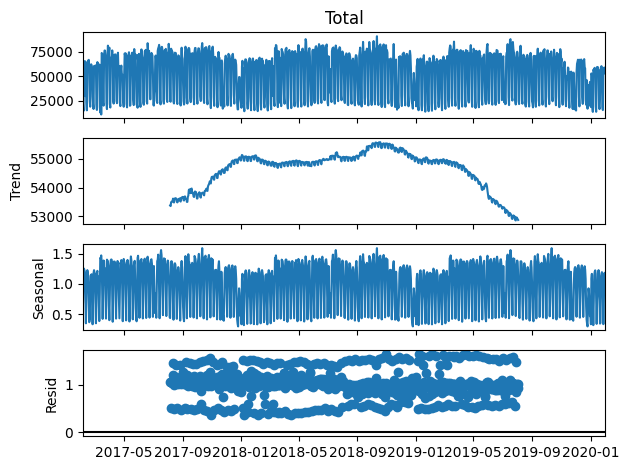

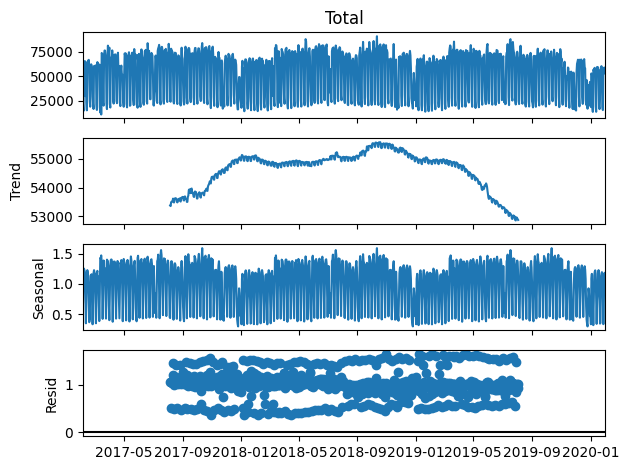

In [ ]:
result = seasonal_decompose(df3['Total'], model="multiplicative", period=365)
result.plot()

In [ ]:
!pip install pymannkendall
import pymannkendall as mk
mk.original_test(df3['Total'])

Mann_Kendall_Test(trend='no trend', h=False, p=0.0890766407699739, z=-1.7002886688005658, Tau=-0.0343587057610889, s=-20467.0, var_s=144884063.66666666, slope=-2.1405754868708105, intercept=65499.18392808803)

Null hypothesis: Trend is not present

Alternate hypothesis: Trend is present

So we accept null hypotheses meaning trend is not present in the data

In [ ]:
from scipy.stats import kruskal
def seasonality_test(series,pr):
  seasonal=False
  idx=np.arange(len(series.index))% pr
  H_statistic,p_value=kruskal(series,idx)
  if p_value<=0.05:
    seasonal=True
    print("p-value ",p_value)
  return seasonal

print(seasonality_test(df3['Total'],7)) #checking for weekly seasonality
#print(seasonality_test(df3['Total'],30)) #checking for monthly seasonality
#print(seasonality_test(df3['Total'],120)) #checking for quarterly seasonality
#print(seasonality_test(df3['Total'],365)) #checking for daily seasonality'''

'''from scipy import stats
res=[]
for i in df3.index.unique():
    res.append(df3[df3.index==i]['Total'].values)
stats.kruskal(*res)'''

p-value  0.0
True


"from scipy import stats\nres=[]\nfor i in df3.index.unique():\n    res.append(df3[df3.index==i]['Total'].values)\nstats.kruskal(*res)"

From Kruskal test we can see that there is weekly seasonality present.

In [ ]:
df3.shape

(1092, 4)

In [ ]:
train = df3.iloc[:874, 3:]
test = df3.iloc[874:, 3:]

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

In [ ]:
fit=ExponentialSmoothing(train,seasonal_periods=7,trend=None,seasonal='add',
                         initialization_method="estimated").fit()
pred=fit.forecast(len(test))
pred

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2019-06-28 20:00:00    64070.228275
2019-06-29 20:00:00    26402.704455
2019-06-30 20:00:00    21099.108824
2019-07-01 20:00:00    67136.499725
2019-07-02 20:00:00    72174.474389
                           ...     
2020-01-27 20:00:00    67136.499725
2020-01-28 20:00:00    72174.474389
2020-01-29 20:00:00    73660.208635
2020-01-30 20:00:00    74427.537474
2020-01-31 20:00:00    64070.228275
Freq: D, Length: 218, dtype: float64

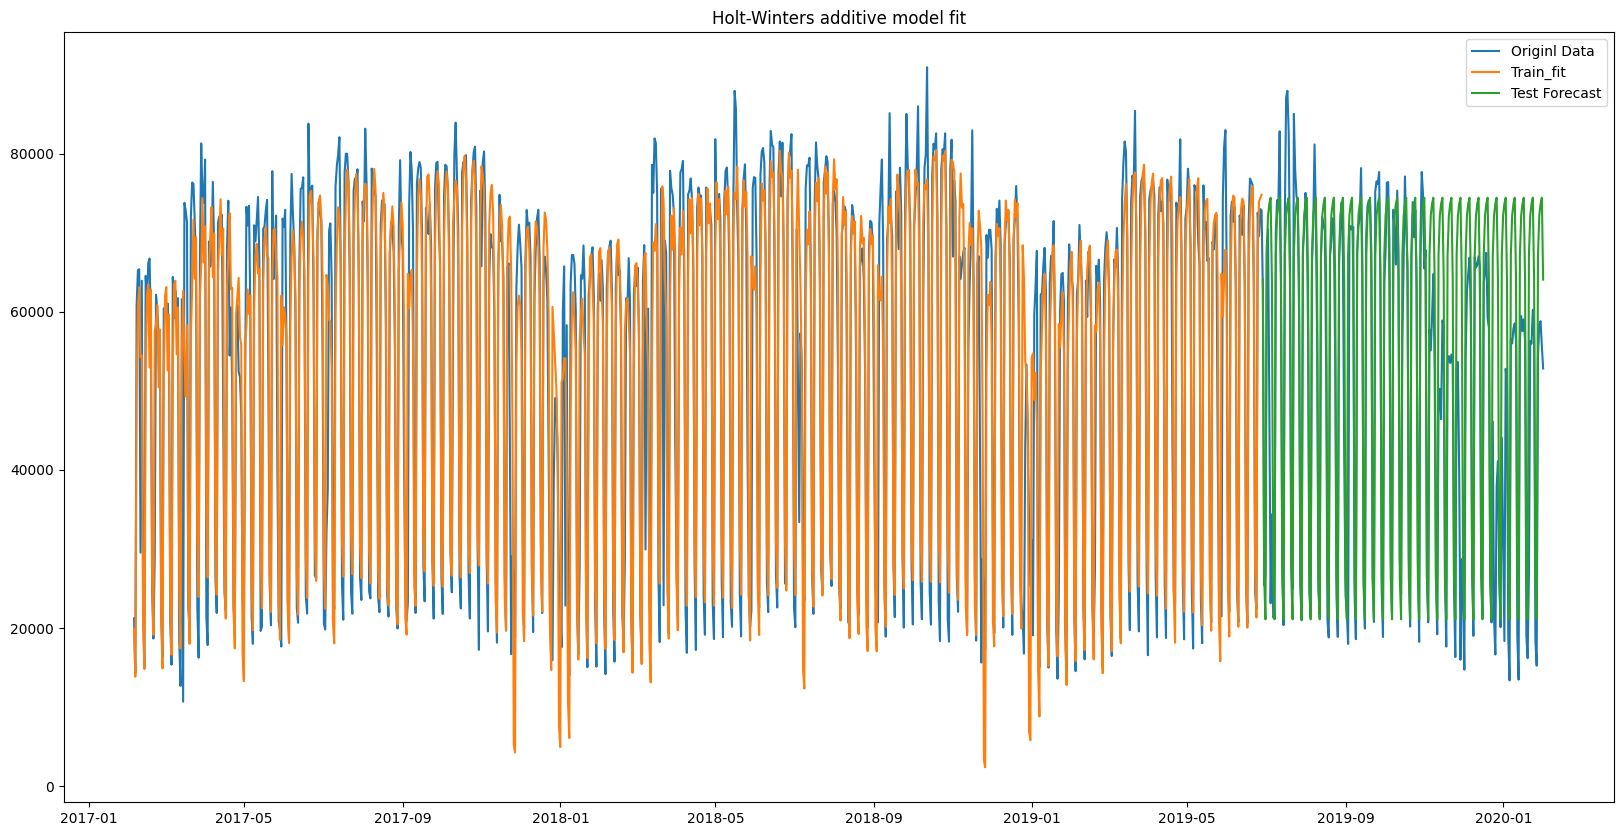

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Holt-Winters additive model fit")
plt.plot(df3['Total'],label="Originl Data")
plt.plot(fit.fittedvalues,label="Train_fit")
plt.plot(pred,label="Test Forecast")
plt.legend()

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_train = sqrt(mean_squared_error(train, fit.fittedvalues))
print("Rmse on training data : ", rmse_train)
mape_train = mape(train, fit.fittedvalues)
print("MAPE of the training data : ", mape_train)
rmse = sqrt(mean_squared_error(test, pred))
print("Rmse of the test data is : ",rmse)
mape = mape(test, pred)
print("MAPE of the test data is : ",mape)

Rmse on training data :  9614.119066704472
MAPE of the training data :  0.16281408585681298
Rmse of the test data is :  13680.520520729915
MAPE of the test data is :  0.2351343395689906


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Rmse on training data :  9384.283057191025
MAPE of the training data :  0.1434076994261699
Rmse of the test data is :  13860.619496768135
MAPE of the test data is :  0.23488844180064772


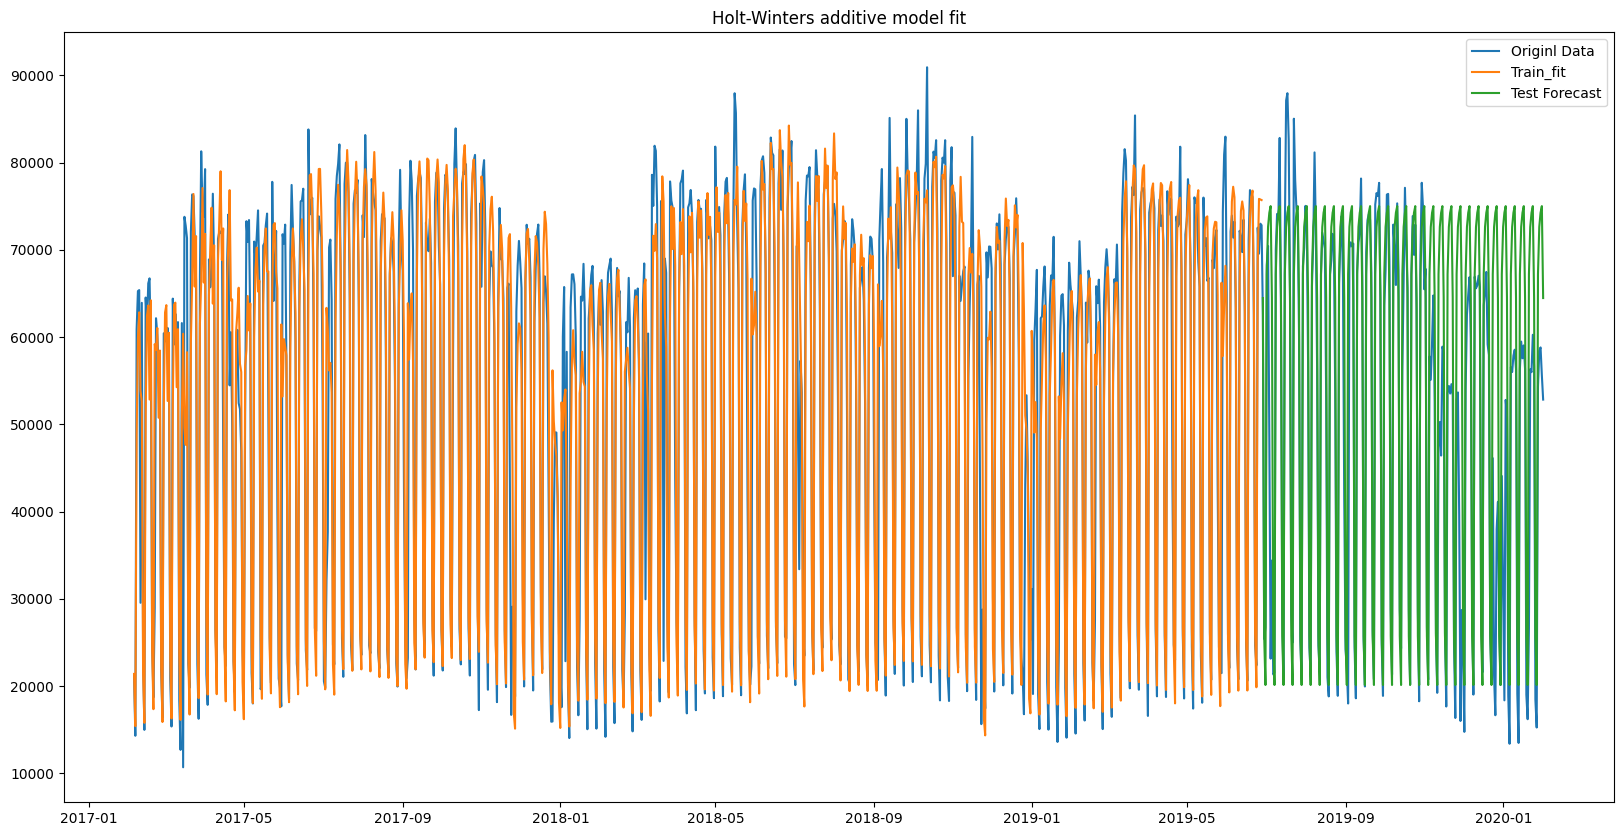

In [ ]:
fit=ExponentialSmoothing(train,seasonal_periods=7,trend=None,seasonal='multiplicative',
                         initialization_method="estimated").fit()
pred=fit.forecast(len(test))
pred

plt.figure(figsize=(20,10))
plt.title("Holt-Winters additive model fit")
plt.plot(df3['Total'],label="Originl Data")
plt.plot(fit.fittedvalues,label="Train_fit")
plt.plot(pred,label="Test Forecast")
plt.legend()

from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_train = sqrt(mean_squared_error(train, fit.fittedvalues))
print("Rmse on training data : ", rmse_train)
mape_train = mape(train, fit.fittedvalues)
print("MAPE of the training data : ", mape_train)
rmse = sqrt(mean_squared_error(test, pred))
print("Rmse of the test data is : ",rmse)
mape = mape(test, pred)
print("MAPE of the test data is : ",mape)

Actual forecasting for Exponential model

In [ ]:
fit=ExponentialSmoothing(df3['Total'],seasonal_periods=7,trend=None,seasonal='multiplicative',
                         initialization_method="estimated").fit()
pred=fit.forecast(30)
pred

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2020-02-01 20:00:00    22667.158892
2020-02-02 20:00:00    16818.236047
2020-02-03 20:00:00    52049.690621
2020-02-04 20:00:00    55571.827695
2020-02-05 20:00:00    54505.527136
2020-02-06 20:00:00    57756.112712
2020-02-07 20:00:00    53211.323896
2020-02-08 20:00:00    22667.158892
2020-02-09 20:00:00    16818.236047
2020-02-10 20:00:00    52049.690621
2020-02-11 20:00:00    55571.827695
2020-02-12 20:00:00    54505.527136
2020-02-13 20:00:00    57756.112712
2020-02-14 20:00:00    53211.323896
2020-02-15 20:00:00    22667.158892
2020-02-16 20:00:00    16818.236047
2020-02-17 20:00:00    52049.690621
2020-02-18 20:00:00    55571.827695
2020-02-19 20:00:00    54505.527136
2020-02-20 20:00:00    57756.112712
2020-02-21 20:00:00    53211.323896
2020-02-22 20:00:00    22667.158892
2020-02-23 20:00:00    16818.236047
2020-02-24 20:00:00    52049.690621
2020-02-25 20:00:00    55571.827695
2020-02-26 20:00:00    54505.527136
2020-02-27 20:00:00    57756.112712
2020-02-28 20:00:00    53211

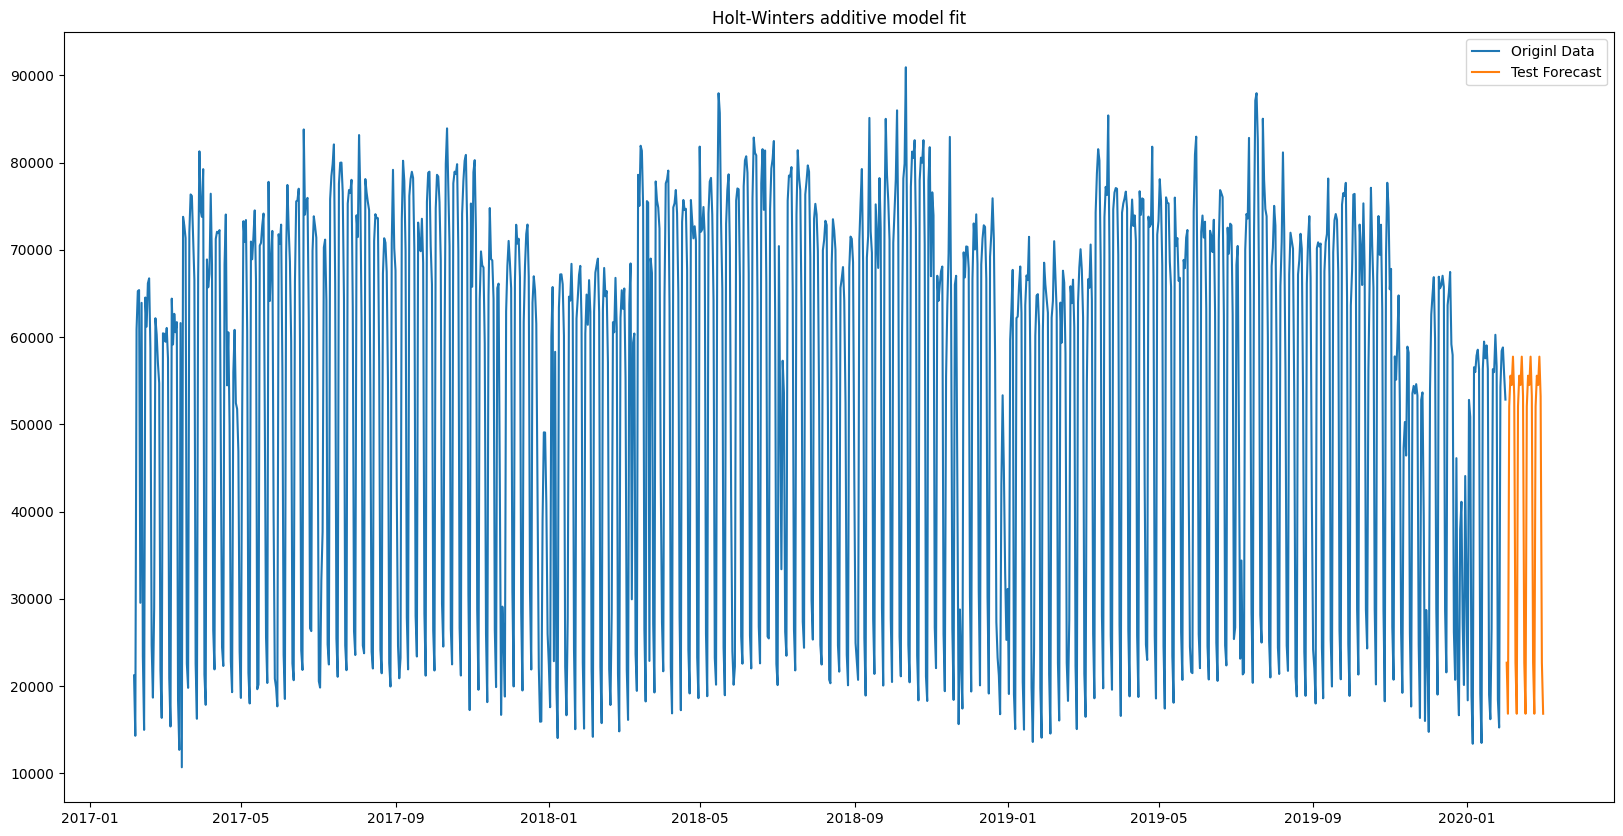

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Holt-Winters additive model fit")
plt.plot(df3['Total'],label="Originl Data")
plt.plot(pred,label="Test Forecast")
plt.legend()

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(df3['Total'])
adf_op = pd.Series(adfuller(df3['Total'], autolag='AIC')[:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adfuller(df3['Total'])[4].items():
  adf_op['Critical Value (%s)'% key]=value
print(adf_op)

Test Statistic                   -4.901818
p-value                           0.000035
#Lags Used                       22.000000
Number of Observations Used    1069.000000
Critical Value (1%)              -3.436482
Critical Value (5%)              -2.864247
Critical Value (10%)             -2.568212
dtype: float64


Null: The time series has a unit root, indicating it is non-stationary.

Alternate: The time series does not have a unit root, indicating it is stationary.

As p value is less than 0.05 so we reject null hypotheses meaning there is stationarity.

In [ ]:
from statsmodels.tsa.stattools import kpss
kpsstest = kpss(df3['Total'], regression="c", nlags="auto")
kpsstest
kpss_output = pd.Series(kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"])
kpss_output

<ipython-input-15-63dd1aee4cea>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(df3['Total'], regression="c", nlags="auto")


Test Statistic      0.128786
p-value             0.100000
Lags Used         142.000000
dtype: float64

Null: Trend Stationary

Alternate: Not trend stationary

As p value is greater than 0.05 so we accept null hypotheses meaning there is trend stationarity.

<Figure size 1000x600 with 0 Axes>

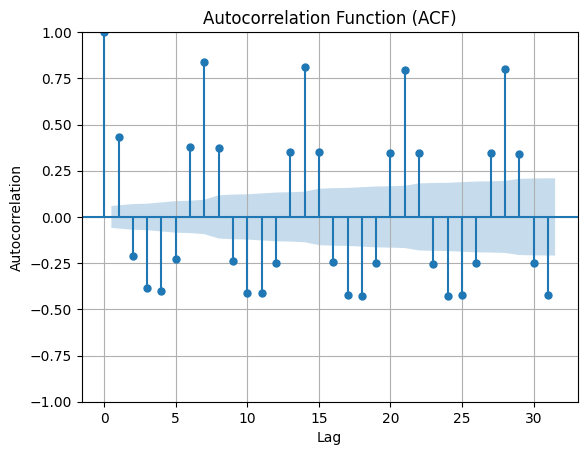

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plt.figure(figsize=(10, 6))
plot_acf(df3['Total'])
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

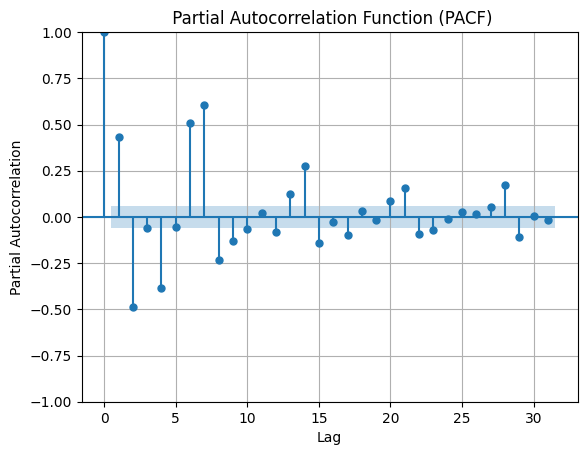

In [ ]:
plt.figure(figsize=(10, 6))
plot_pacf(df3['Total'], alpha=0.05)
plt.title(' Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

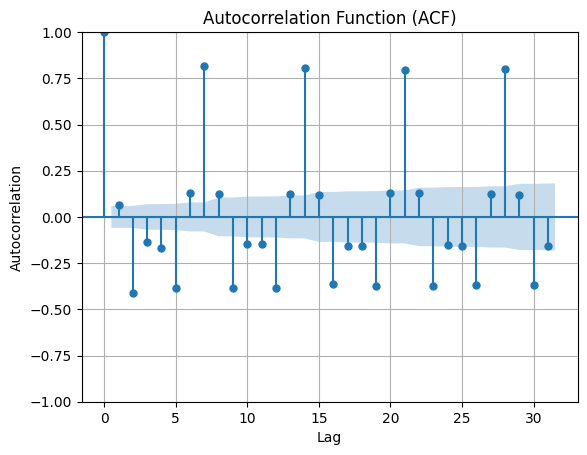

<Figure size 1000x600 with 0 Axes>

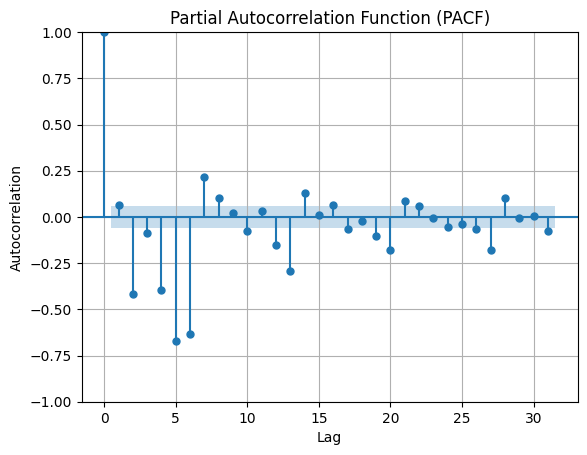

In [ ]:
diff = df3['Total'].diff().dropna()
diff = pd.DataFrame(diff)

plt.figure(figsize=(10, 6))
plot_acf(diff)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plot_pacf(diff)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

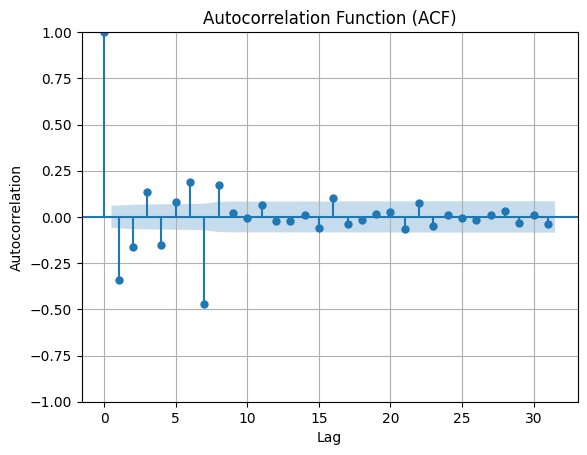

<Figure size 1000x600 with 0 Axes>

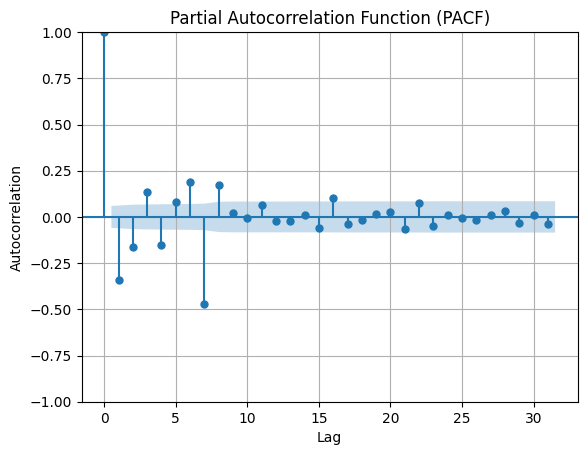

In [ ]:
#seasonal differencing on non-seasonal differenced data
sdiff1 = diff['Total'].diff(periods=7).dropna()
sdiff1 = pd.DataFrame(sdiff1)

plt.figure(figsize=(10, 6))
plot_acf(sdiff1)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plot_acf(sdiff1)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

In [ ]:
sdiff = df3['Total'].diff(periods=7).dropna()
sdiff

Datetime
2017-02-11 20:00:00     2194.0
2017-02-12 20:00:00      676.0
2017-02-13 20:00:00     3633.0
2017-02-14 20:00:00    -4075.0
2017-02-15 20:00:00      772.0
                        ...   
2020-01-27 20:00:00    27630.0
2020-01-28 20:00:00     2089.0
2020-01-29 20:00:00     2837.0
2020-01-30 20:00:00    -4632.0
2020-01-31 20:00:00    -3810.0
Name: Total, Length: 1085, dtype: float64

In [ ]:
sdiff = pd.DataFrame(sdiff)
sdiff.head()

Total
Datetime                   
2017-02-11 20:00:00  2194.0
2017-02-12 20:00:00   676.0
2017-02-13 20:00:00  3633.0
2017-02-14 20:00:00 -4075.0
2017-02-15 20:00:00   772.0

<Figure size 1000x600 with 0 Axes>

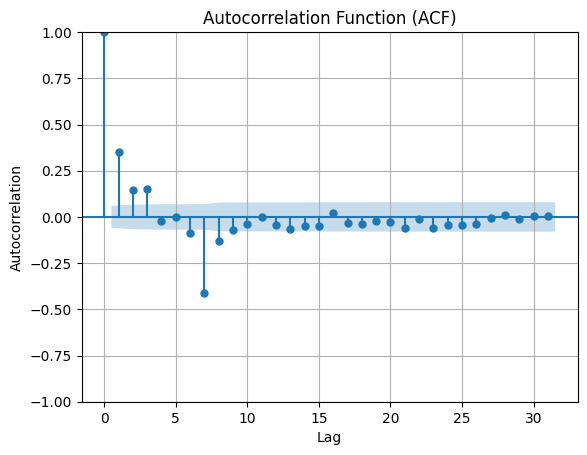

In [ ]:
plt.figure(figsize=(10, 6))
plot_acf(sdiff)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

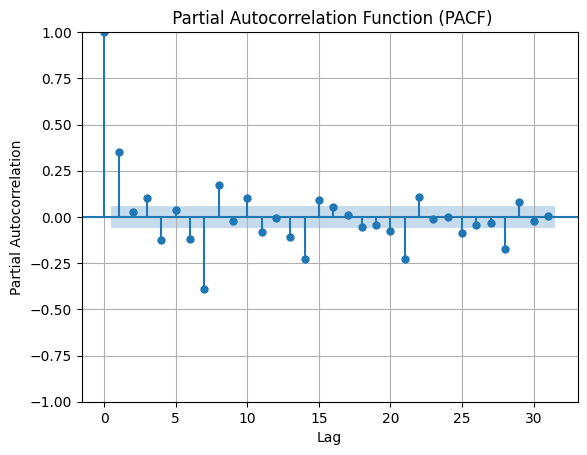

In [ ]:
plt.figure(figsize=(10, 6))
plot_pacf(sdiff)
plt.title(' Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

In [ ]:
#!pip install pmdarima
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

auto_arima_model = auto_arima(df3['Total'], seasonal=True, trace=True, suppress_warnings=True)
auto_arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=24553.443, Time=2.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=25028.218, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=24805.342, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=24582.649, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=27072.497, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=24590.362, Time=1.18 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=24514.183, Time=6.77 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=24595.685, Time=1.38 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=24509.827, Time=0.96 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=24507.886, Time=1.13 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=24336.764, Time=0.65 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=24335.448, Time=0.71 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=24336.250, Time=3.37 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=24338.161, Time=2.93 sec
 ARIMA(5,0,0)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1092
Model:               SARIMAX(5, 0, 0)   Log Likelihood              -12160.724
Date:                Thu, 18 Apr 2024   AIC                          24335.448
Time:                        14:50:25   BIC                          24370.419
Sample:                    02-04-2017   HQIC                         24348.683
                         - 01-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7.045e+04   2758.697     25.539      0.000     6.5e+04    7.59e+04
ar.L1          0.5685      0.035     16.455      0.000       0.501       0.636
ar.L2         -0.6131      0.035    -17.295      0.000      -0.683      -0.544
ar.L3          0.1404      0.037      3.759      0.000       0.067       0.214
ar.L4         -0.3502      0.037     -9.532      0.000      -0.422      -0.278
ar.L5         -0.0551      0.029     -1.869      0.062      -0.113       0.003
sigma2      2.753e+08      0.157   1.76e+09      0.000    2.75e+08    2.75e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.86   Jarque-Bera (JB):                 6.16
Prob(Q):                              0.35   Prob(JB):                         0.05
Heteroskedasticity (H):               0.93   Skew:                            -0.16
Prob(H) (two-sided):                  0.47   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.52e+27. Standard errors may be unstable.
"""

In [ ]:
import statsmodels.api as sm

                                       SARIMAX Results                                        
Dep. Variable:                                  Total   No. Observations:                  874
Model:             SARIMAX(4, 1, 4)x(2, 1, [1, 2], 7)   Log Likelihood               -9221.400
Date:                                Thu, 18 Apr 2024   AIC                          18468.799
Time:                                        14:56:52   BIC                          18530.730
Sample:                                    02-04-2017   HQIC                         18492.501
                                         - 06-27-2019                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8572      0.642     -1.336      0.181      -2.115       0.400
ar.

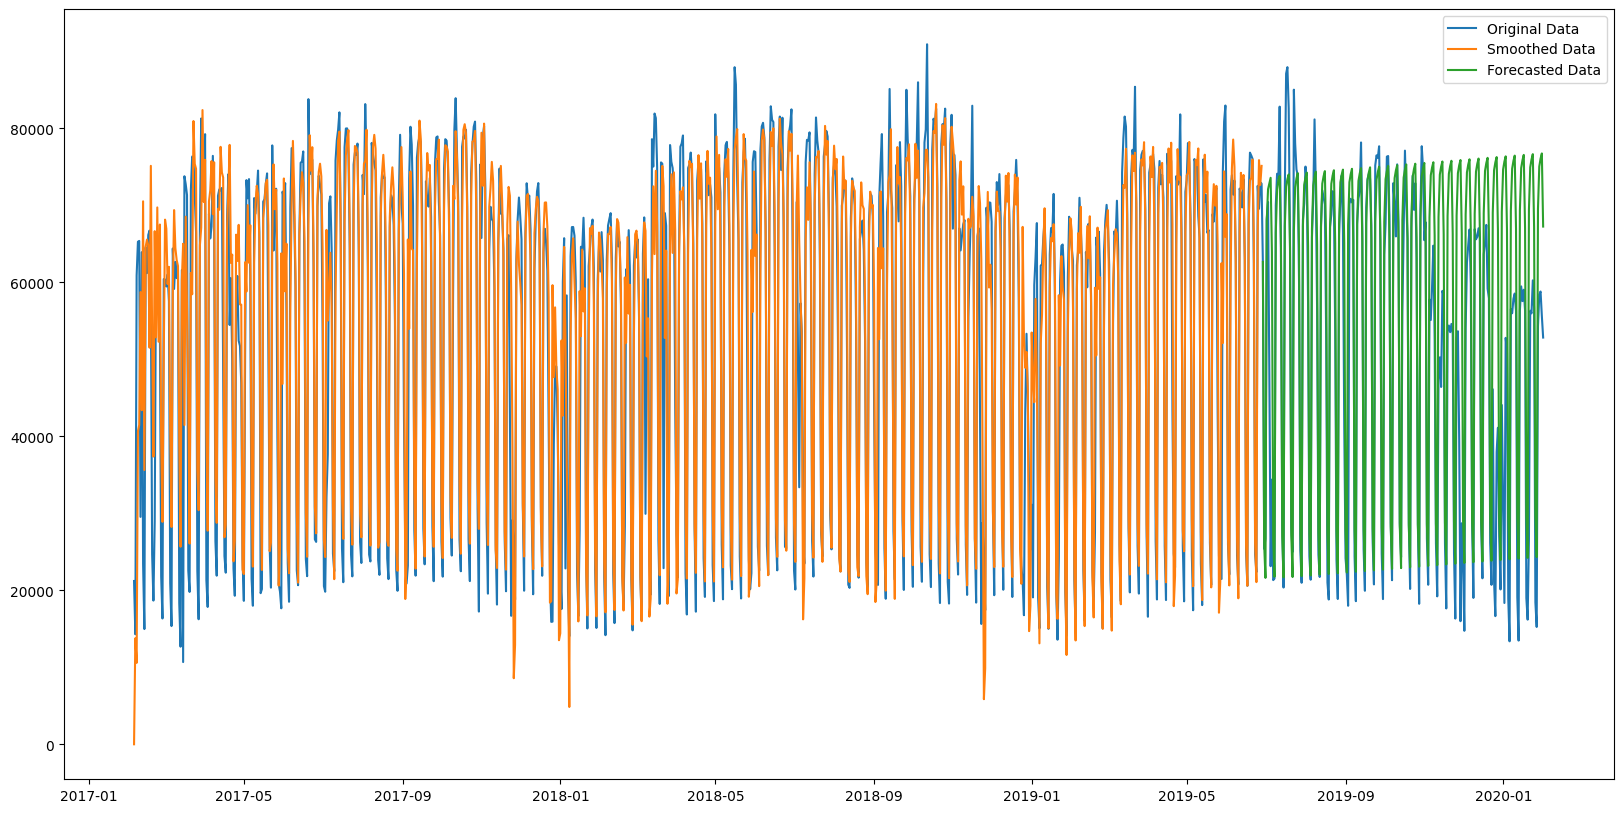

In [ ]:
model = sm.tsa.statespace.SARIMAX(train, order=(4,1,4), seasonal_order=(2,1,2,7))
model = model.fit()
print(model.summary())
pred = model.forecast(len(test))
pred

plt.figure(figsize=(20,10))
plt.plot(df3.index, df3['Total'],label='Original Data ')
plt.plot(model.fittedvalues, label='Smoothed Data')
plt.plot(pred,label='Forecasted Data')
plt.legend()

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error as mape
from math import sqrt
rmse_train = sqrt(mean_squared_error(train, model.fittedvalues))
print("Rmse of the train dataset is : ",rmse_train)
mape_train = mape(train, model.fittedvalues)
print("Mape of the model is : ", mape_train)
rmse = sqrt(mean_squared_error(test, pred))
print("Rmse of the model is : ",rmse)
mape = mape(test, pred)
print("MAPE of the model is : ",mape)

                                       SARIMAX Results                                        
Dep. Variable:                                  Total   No. Observations:                  874
Model:             SARIMAX(6, 1, 6)x(2, 1, [1, 2], 7)   Log Likelihood               -9190.846
Date:                                Thu, 18 Apr 2024   AIC                          18415.693
Time:                                        15:00:23   BIC                          18496.679
Sample:                                    02-04-2017   HQIC                         18446.687
                                         - 06-27-2019                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4566      0.707     -0.646      0.518      -1.842       0.929
ar.

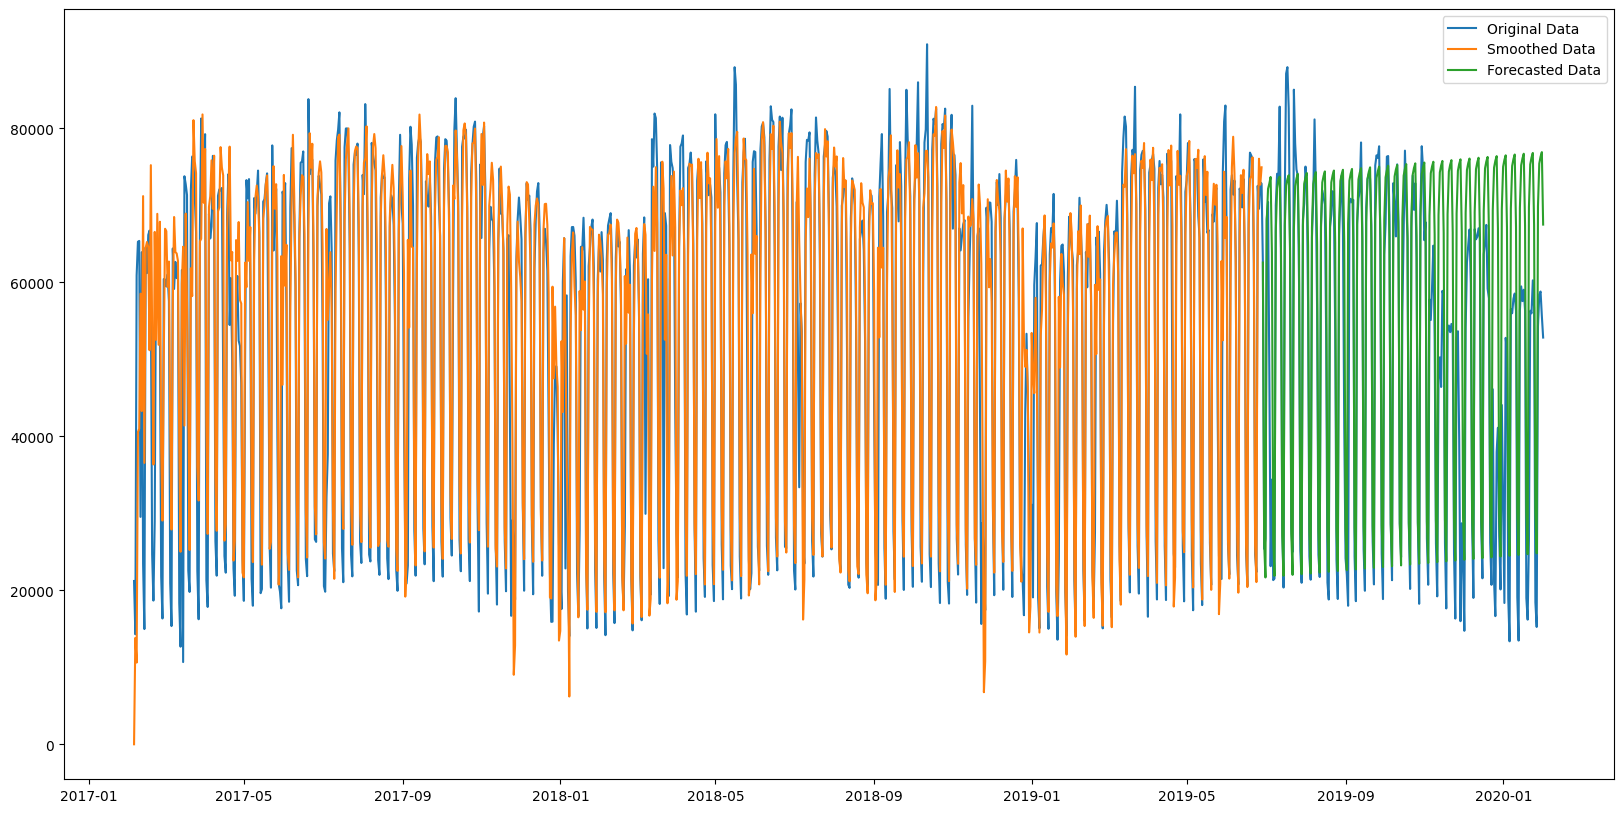

In [ ]:
model = sm.tsa.statespace.SARIMAX(train, order=(6,1,6), seasonal_order=(2,1,2,7))
model = model.fit()
print(model.summary())
pred = model.forecast(len(test))
pred

plt.figure(figsize=(20,10))
plt.plot(df3.index, df3['Total'],label='Original Data ')
plt.plot(model.fittedvalues, label='Smoothed Data')
plt.plot(pred,label='Forecasted Data')
plt.legend()

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error as mape
from math import sqrt
rmse_train = sqrt(mean_squared_error(train, model.fittedvalues))
print("Rmse of the train dataset is : ",rmse_train)
mape_train = mape(train, model.fittedvalues)
print("Mape of the train dataset is : ", mape_train)
rmse = sqrt(mean_squared_error(test, pred))
print("Rmse of the test dataset is : ",rmse)
mape = mape(test, pred)
print("MAPE of the test dataset is : ",mape)

In [ ]:
import statsmodels.api as sm

In [ ]:
'''model = sm.tsa.statespace.SARIMAX(train, order=(1,0,1), seasonal_order=(4,1,1,7))
model = model.fit()
pred = model.forecast(len(test))
pred

In [ ]:
'''plt.figure(figsize=(20,10))
plt.plot(df3.index, df3['Total'],label='Original Data ')
plt.plot(model.fittedvalues, label='Smoothed Data')
plt.plot(pred,label='Forecasted Data')
plt.legend()

In [ ]:
'''from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error as mape
from math import sqrt
rmse_train = sqrt(mean_squared_error(train, model.fittedvalues))
print("Rmse of the train dataset is : ",rmse_train)
mape_train = mape(train, model.fittedvalues)
print("Mape of the model is : ", mape_train)
rmse = sqrt(mean_squared_error(test, pred))
print("Rmse of the model is : ",rmse)
mape = mape(test, pred)
print("MAPE of the model is : ",mape)

In [ ]:
'''model = sm.tsa.statespace.SARIMAX(train, order=(1,1,1), seasonal_order=(4,1,1,7))
model = model.fit()
pred = model.forecast(len(test))
pred

In [ ]:
'''plt.figure(figsize=(20,10))
plt.plot(df3.index, df3['Total'],label='Original Data ')
plt.plot(model.fittedvalues, label='Smoothed Data')
plt.plot(pred,label='Forecasted Data')
plt.legend()

In [ ]:
'''from sklearn.metrics import mean_absolute_percentage_error as mape
rmse_train = sqrt(mean_squared_error(train, model.fittedvalues))
print("Rmse of the train dataset is : ",rmse_train)
mape_train = mape(train, model.fittedvalues)
print("Mape of the train dataset is : ", mape_train)
rmse = sqrt(mean_squared_error(test, pred))
print("Rmse of the test dataset is : ",rmse)
mape = mape(test, pred)
print("MAPE of the test dataset is : ",mape)

Actual forecasting for SARIMAX model

In [ ]:
model = sm.tsa.statespace.SARIMAX(df3['Total'], order=(6,1,6), seasonal_order=(2,1,2,7))
model = model.fit()
pred = model.forecast(30)
pred

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2020-02-01 20:00:00    18857.656453
2020-02-02 20:00:00    11155.172632
2020-02-03 20:00:00    53102.287795
2020-02-04 20:00:00    57896.953757
2020-02-05 20:00:00    56816.353308
2020-02-06 20:00:00    58403.307590
2020-02-07 20:00:00    51013.923763
2020-02-08 20:00:00    16565.051181
2020-02-09 20:00:00    10553.432078
2020-02-10 20:00:00    52802.178444
2020-02-11 20:00:00    58059.239637
2020-02-12 20:00:00    57510.475046
2020-02-13 20:00:00    58338.105214
2020-02-14 20:00:00    50732.936841
2020-02-15 20:00:00    15589.990302
2020-02-16 20:00:00    10147.823424
2020-02-17 20:00:00    52279.408973
2020-02-18 20:00:00    57376.998418
2020-02-19 20:00:00    57311.808851
2020-02-20 20:00:00    57931.865565
2020-02-21 20:00:00    50366.743049
2020-02-22 20:00:00    15502.369264
2020-02-23 20:00:00     9918.215781
2020-02-24 20:00:00    52677.139521
2020-02-25 20:00:00    57327.506821
2020-02-26 20:00:00    57301.575995
2020-02-27 20:00:00    58064.475269
2020-02-28 20:00:00    50270

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                  Total   No. Observations:                 1092
Model:             SARIMAX(6, 1, 6)x(2, 1, [1, 2], 7)   Log Likelihood              -11491.869
Date:                                Thu, 18 Apr 2024   AIC                          23017.738
Time:                                        17:50:40   BIC                          23102.541
Sample:                                    02-04-2017   HQIC                         23049.843
                                         - 01-31-2020                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5824      0.633     -0.920      0.358      -1.823       0.658
ar.L2         -0.3569      0.631     -0.565      0.572      -1.594       0.880
ar.L3         -0.3140      0.578     -0.543      0.587      -1.447       0.819
ar.L4         -0.2567      0.429     -0.599      0.549      -1.097       0.583
ar.L5          0.2137      0.329      0.649      0.517      -0.432       0.859
ar.L6          0.1747      0.235      0.742      0.458      -0.287       0.636
ma.L1          0.0708      0.634      0.112      0.911      -1.172       1.314
ma.L2         -0.2335      0.547     -0.427      0.669      -1.305       0.838
ma.L3          0.0227      0.521      0.044      0.965      -0.998       1.043
ma.L4         -0.1039      0.510     -0.204      0.839      -1.103       0.895
ma.L5         -0.5191      0.424     -1.224      0.221      -1.350       0.312
ma.L6         -0.0939      0.436     -0.215      0.830      -0.949       0.761
ar.S.L7       -0.5462      0.520     -1.051      0.293      -1.565       0.473
ar.S.L14       0.2360      0.154      1.535      0.125      -0.065       0.537
ma.S.L7       -0.1703      0.548     -0.311      0.756      -1.245       0.904
ma.S.L14      -0.7944      0.530     -1.500      0.134      -1.832       0.244
sigma2      1.322e+08    2.9e-08   4.55e+15      0.000    1.32e+08    1.32e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):              2795.80
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               0.66   Skew:                            -1.77
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.7e+31. Standard errors may be unstable.
"""

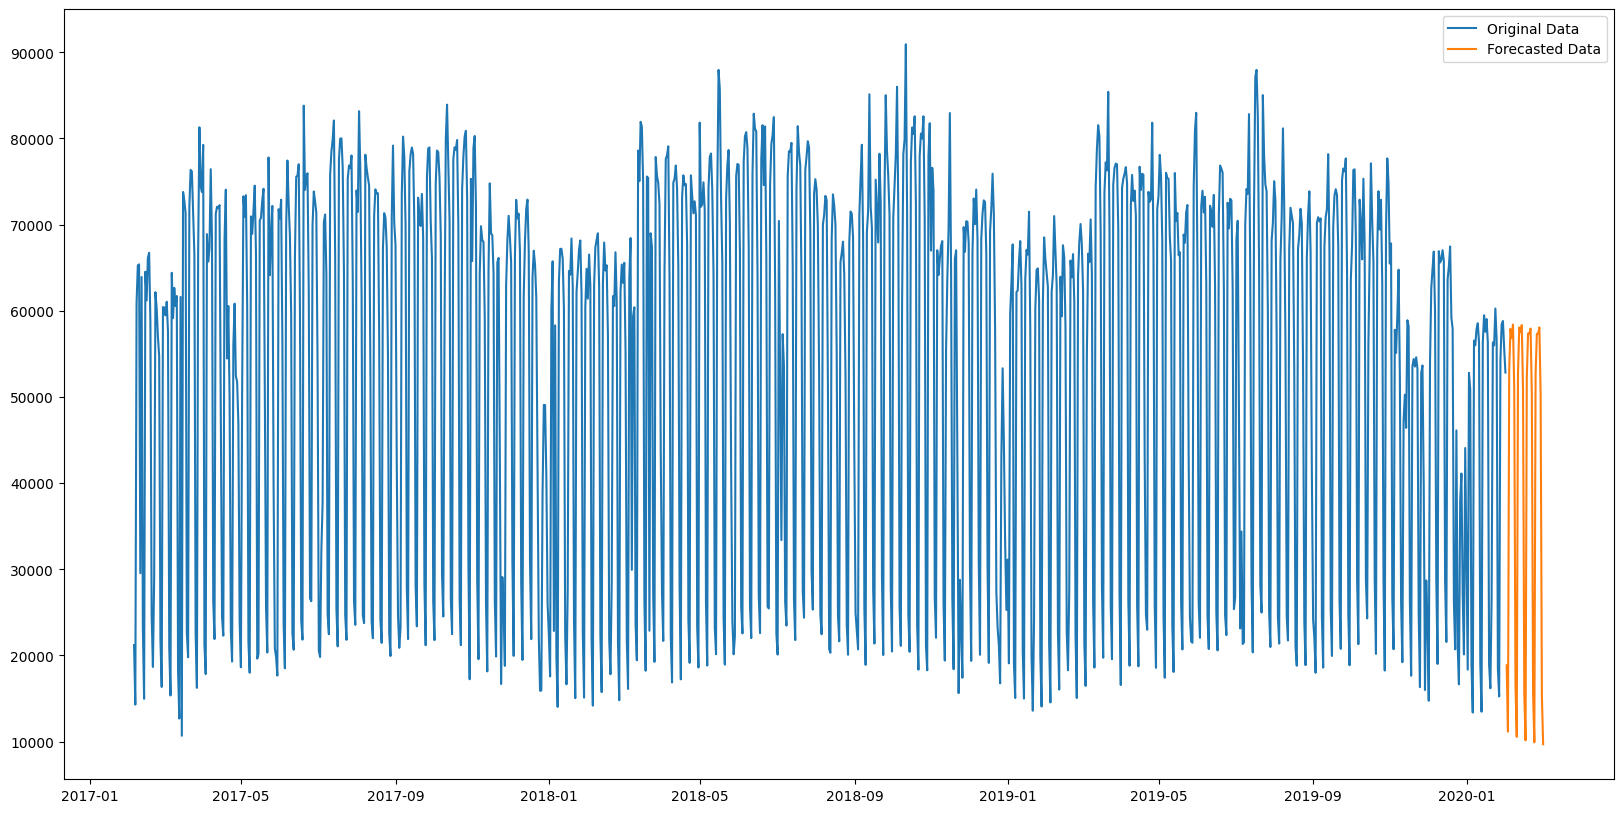

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df3.index, df3['Total'],label='Original Data ')
plt.plot(pred,label='Forecasted Data')
plt.legend()

In [ ]:
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dropout, Dense, Flatten
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df3.Total.values.reshape((-1,1)))
scaled_values

array([[0.13120249],
       [0.04500935],
       [0.62581931],
       ...,
       [0.59980062],
       [0.56012461],
       [0.52527103]])

In [ ]:
def create_dataset(data, look_back):
  # data = data[col]
  X, Y = [], []
  for i in range(len(data)-look_back):
      # print(i, data[i+look_back])
      X.append(data[i:i+look_back])
      Y.append(data[i+look_back])
  return np.array(X), np.array(Y)


lookback = 4
X, y = create_dataset(scaled_values, lookback)
# test_x, test_y = create_dataset(test_scaled, feature, lookback)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
# print("Shape of test_x:", test_x.shape)
# print("Shape of test_y:", test_y.shape)

Shape of X: (1088, 4, 1)
Shape of y: (1088, 1)


In [ ]:
date_x, date_y = create_dataset(df3.index, lookback)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(lookback, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
smoothed_data=model.fit(X_train,y_train, epochs=110,batch_size=64,verbose=1)

Epoch 1/110
14/14 [==============================] - 2s 7ms/step - loss: 0.3075
Epoch 2/110
14/14 [==============================] - 0s 7ms/step - loss: 0.1625
Epoch 3/110
14/14 [==============================] - 0s 8ms/step - loss: 0.1133
Epoch 4/110
14/14 [==============================] - 0s 7ms/step - loss: 0.1008
Epoch 5/110
14/14 [==============================] - 0s 7ms/step - loss: 0.0925
Epoch 6/110
14/14 [==============================] - 0s 7ms/step - loss: 0.0831
Epoch 7/110
14/14 [==============================] - 0s 8ms/step - loss: 0.0744
Epoch 8/110
14/14 [==============================] - 0s 7ms/step - loss: 0.0676
Epoch 9/110
14/14 [==============================] - 0s 7ms/step - loss: 0.0621
Epoch 10/110
14/14 [==============================] - 0s 7ms/step - loss: 0.0608
Epoch 11/110
14/14 [==============================] - 0s 7ms/step - loss: 0.0596
Epoch 12/110
14/14 [==============================] - 0s 9ms/step - loss: 0.0589
Epoch 13/110
14/14 [=================

In [ ]:
test_forecast = scaler.inverse_transform(model.predict(X_test))
test_forecast

7/7 [==============================] - 0s 4ms/step


array([[49535.43 ],
       [37850.8  ],
       [21315.951],
       [70963.87 ],
       [70399.086],
       [72712.1  ],
       [45368.887],
       [24332.264],
       [55157.508],
       [51925.9  ],
       [55523.508],
       [74555.914],
       [75369.23 ],
       [73138.88 ],
       [62526.03 ],
       [31769.576],
       [24141.064],
       [74678.234],
       [72174.35 ],
       [84391.33 ],
       [87457.734],
       [51951.484],
       [29536.9  ],
       [24197.367],
       [76671.59 ],
       [83897.77 ],
       [78255.57 ],
       [76816.06 ],
       [44998.2  ],
       [30731.484],
       [23062.467],
       [67797.6  ],
       [70515.58 ],
       [71555.664],
       [74195.59 ],
       [49834.562],
       [30793.914],
       [23933.896],
       [64088.38 ],
       [70069.62 ],
       [72511.51 ],
       [78964.04 ],
       [46479.324],
       [30236.66 ],
       [25436.812],
       [62697.953],
       [71400.16 ],
       [73501.79 ],
       [69435.69 ],
       [48630.387],


In [ ]:
X_train_date, X_test_date, y_train_date, y_test_date = train_test_split(date_x, date_y, test_size=0.2, shuffle=False)

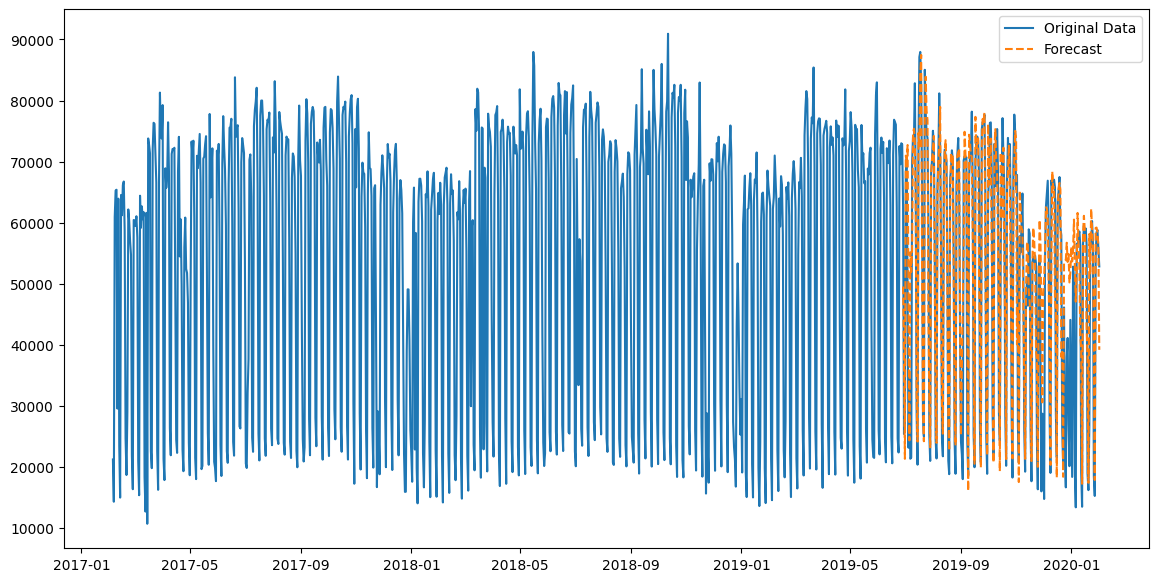

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df3.index, df3['Total'], label='Original Data')
plt.plot(y_test_date, test_forecast, label='Forecast', linestyle='--')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, test_forecast))
print("Rmse of the model is : ",rmse)
mape = mape(y_test, test_forecast)
print("MAPE of the model is : ",mape)

Rmse of the model is :  56233.84969344393
MAPE of the model is :  154824.1229093318
